1.Introduction
==

Machine learning in computer science deals with a collection of algorithms that can process data and extract information, or knowledge, or various patterns. There are two broad categories of algorithms that can learn from data, supervised and unsupervised learning algorithms. Here we will look at the basics of supervised learning algorithms.

Depending on real world data, there are two general classes of problems we want to solve by supervised learning methods, regression and classification.

### Regression
Regression is a type of problem in which we try to predict how a system behaves. In this case a system depends on N number of external factors, or inputs. Depending on the state of these inputs the system behaves in a certain way, or gives some output. Initially we don't know how the inputs map on to the outputs of the system. In mathematical terms it can be stated as,

Let a system depend on $N$ inputs, $x_0, x_1, x_2, ... x_i ... x_N$ and gives an output y, then the relation between these inputs and outputs can be written as,
\begin{equation}
y = F(x_0, x_1, ..., x_N)
\end{equation}

We have no idea how $F$ is represented mathematically, or analytically, it is typically a black box to us. So the solution is to feed various kinds of inputs to the system and observe every output that it gives. This measurement data can then be used to fit known mathematical model to approximately simulate the behaviour of this system under study. This process of learning the behaviour of a system is known as regression. Curve fitting techniques include linear regression and non-linear regression.



In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

### Linear Regression
To study regression let us first consider the simplest model, a straight line. The equation of a straight line can be written as,
\begin{equation}
y=mx+c
\end{equation}
Here, it is known that $m$ is the slope, and $c$ is the y-intecept of the line. These two values uniquely describe a line. For any specific line, $x$ is the input for which $y$ is the output, such that the point $(x, y)$ lies on this line.

Also, in natural systems there may be instability, measurement devices introduce finite errors, and various other causes the data we collect to be noisy.

Let us prepare some simulated data that are generated from such a linear system and introduce some noise into it.

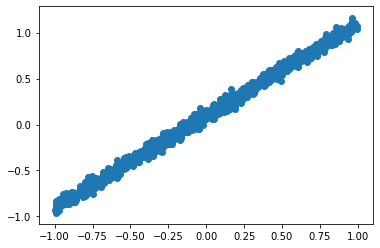

In [177]:
xtest = np.linspace(-1, 1, 1000)
m, c, sd = 1, 0.1, .04  # constants of linear system under study
N = 1000  # no. of data points to create
x = np.random.random(N)*2 - 1  # random sample of input values
y = m * x + c  # plain straight line model
y += np.random.normal(0, sd, x.shape)  # adding some normal noise
# y = m*x+c +np.random.lognormal(1, .1, x.shape)  # try this for different kind of noise
plt.scatter(x, y)  # this is the data that we feed into the ANN.
plt.show()

We will now design a simple ANN using the keras deep learning library to train on this generated data.

In [178]:
def linear_solver_1d(xtrain, ytrain):
    inp = Input(shape=(1,))  # Input layer with one input node. Node represents `x` data.
    out = Dense(1, activation='linear')(inp)  # Output layer with one one representing `y` target data.
    model = Model(inp, out)  # Hooking input and output to a new keras Model
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])  # Tells the low level backend to construct the solver
    model.fit(xtrain, ytrain, batch_size=1, epochs=10,shuffle=True)  # Feed in the training data and labels
    return model

In [180]:
model = linear_solver_1d(x, y)  # model is trained and ready for testing.

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0016 - mse: 0.0016


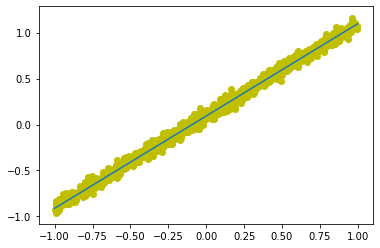

In [181]:
ytest = model.predict(xtest)  # predict values for unknown test data.
plt.scatter(x, y, color='y')  # plot the input data
plt.plot(xtest, ytest)  # plot the predicted data
plt.show()

We see that the prediction fits the input data well. Feel free to play around with the slope and intercept values of the input model.

This is a case of 1D linear regression. The model represents a unitary method calculation like temperature conversion, Ohm's law, simple kinematic problems, and many others. There is a much bigger scope of linear problems for systems that depend on more than one variable to map onto an output. However, we will return to the 1D problem from a different perspective.

### 2. What if our system is non-linear?

A non-linear example: We have a ship on which cannons are mounted at a certain angle. All cannon balls being identical, we can vary the amount of charge to vary the muzzle velocity of the gun. The velocity of the artillery determines how far the cannon ball will go and hit the target. The relationship between the amount of charge and the target distance is complicated but we need to build a targeting system. This is a 1D non-linear problem as the solution cannot be fit on a straight line.

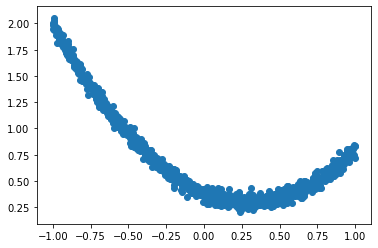

In [182]:
xtest = np.linspace(-1, 1, 1000)  # we will test the model on these x values
sd = .04  
N = 1000  # no. of data points to create
x = np.random.random(N)*2 - 1  # x is 1D array of random number in range [-1, 1)
y = (x-.3)**2 + .3  # a quadratic expression
y += np.random.normal(0, sd, x.shape)  # adding some normal noise
plt.scatter(x, y)  # this is the data that we feed into the ANN.
plt.show()

In [183]:
model = linear_solver_1d(x, y)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1082 - mse: 0.1082
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0948 - mse: 0.0948
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0940 - mse: 0.0940
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0943 - mse: 0.0943
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0946 - mse: 0.0946
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0943 - mse: 0.0943


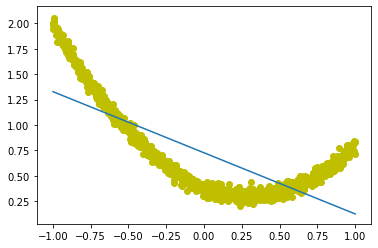

In [184]:
ytest = model.predict(xtest)
plt.scatter(x, y, color='y')
plt.plot(xtest, ytest)
plt.show()

We see that the linear model is not able to represent the data.

Let us then construct a new ANN that has an extra layer between the input and output. This layer can have any number of nodes.

In [193]:
def non_linear_solver_1d(xtrain, ytrain):
    nodes = 10  # number of nodes in the hidden layer. Try 5, 10, 15, ...
    inp = Input(shape=(1,))
    lay = Dense(nodes, activation='relu')(inp)
    out = Dense(1, activation='linear')(lay)
    model = Model(inp, out)
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.fit(xtrain, ytrain, batch_size=1, epochs=10,shuffle=True)
    return model

In [188]:
model = non_linear_solver_1d(x, y);

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0408 - mse: 0.0408
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0054 - mse: 0.0054
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0045 - mse: 0.0045
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0039 - mse: 0.0039
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0032 - mse: 0.0032
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0030 - mse: 0.0030
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0029 - mse: 0.0029
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0028 - mse: 0.0028


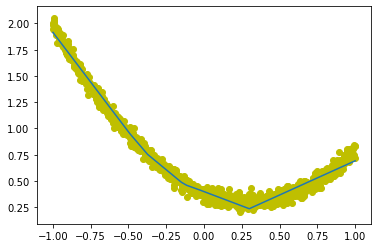

In [190]:
ytest = model.predict(xtest)
plt.scatter(x, y, color='y')  # plotting the input data
plt.plot(xtest, ytest)  # plotting the predicted outcome
plt.show()

We can see that by introducing an intermediate layer in our model, we can predict data that behaves quadratically. Let us see how well it works for data from very non-linear systems.

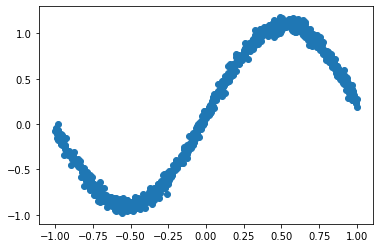

In [191]:
xtest = np.linspace(-1, 1, 1000)  # same test data
c, sd = 0.1, .04
N = 1000  # no. of data points to create
x = np.random.random(N)*2 - 1
y = np.sin(x*3) + c  # sinusoidal variation
y += np.random.normal(0, sd, x.shape)  # adding some normal noise
plt.scatter(x, y)  # this is the data that we feed into the ANN.
plt.show()

In [192]:
model = non_linear_solver_1d(x, y)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1264 - mse: 0.1264
Epoch 2/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0804 - mse: 0.0804
Epoch 3/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0556 - mse: 0.0556
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0353 - mse: 0.0353
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0214 - mse: 0.0214
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0133 - mse: 0.0133
Epoch 7/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0093 - mse: 0.0093
Epoch 8/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0074 - mse: 0.0074
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0062 - mse: 0.0062
Epoch 10/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0052 - mse: 0.0052


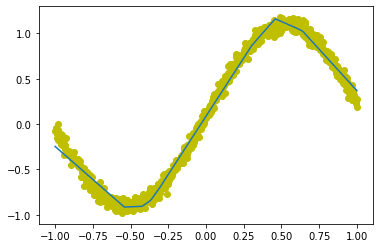

In [194]:
ytest = model.predict(xtest)
plt.scatter(x, y, color='y')
plt.plot(xtest, ytest)
plt.show()

The result looks passable to the eyes, but we can see that the middle section is too straight, with the bends tight. The situation is not remedied by increasing the number of nodes either.

Let us introduce another hidden layer to our model.

In [198]:
def non_linear_solver2_1d(xtrain, ytrain):
    inp = Input(shape=(1,))
    lay = Dense(10, activation='relu')(inp)
    lay = Dense(5, activation='relu')(lay)
    out = Dense(1, activation='linear')(lay)
    model = Model(inp, out)
    model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
    model.fit(xtrain, ytrain, batch_size=1, epochs=10,shuffle=True)
    return model

In [199]:
model = non_linear_solver2_1d(x, y)

Epoch 1/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1422 - mse: 0.1422
Epoch 2/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0471 - mse: 0.0471
Epoch 3/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0180 - mse: 0.0180
Epoch 4/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0091 - mse: 0.0091
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0064 - mse: 0.0064
Epoch 6/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0049 - mse: 0.0049
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0040 - mse: 0.0040
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0035 - mse: 0.0035
Epoch 9/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0032 - mse: 0.0032
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0031 - mse: 0.0031


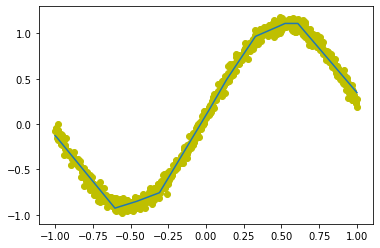

In [200]:
ytest = model.predict(xtest)
plt.scatter(x, y, color='y')
plt.plot(xtest, ytest)
plt.show()

Even with less number of nodes the result is better than one hidden layer.

All these examples were in 1D. Most systems depend on many variables for an outcome. For such systems we need to construct more nodes on the input layer and hidden layers. More importantly we need lots of good data for the model to be able to learn properly. In these examples we created our own data, in the real world data is not so cheap.